# Predicting heart disease using Machine Learning

The Notebook uses data science libraries to build a machine learning model capabale of predicting whether someone has a heart disease based on their medical attributes

. With the parameters about the patients, we can predict whether a patient has the susceptability of having a heart disease or nay

## Data

-The data came from a UCI machine learning repsoitory

There is also a version of it in kaggle.

## What defines success
- If the model is capable of hitting 95% during the proof of concept, we move to next phase

## Features
```
    age: age in years
    sex: sex
        1 = male
        0 = female
    cp: chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholestoral in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl)
        1 = true;
        0 = false
    restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    thalach: maximum heart rate achieved
    exang: exercise induced angina
        1 = yes
        0 = no
    oldpeak = ST depression induced by exercise relative to rest
    slope: the slope of the peak exercise ST segment
        Value 0: upsloping
        Value 1: flat
        Value 2: downsloping
    ca: number of major vessels (0-3) colored by flourosopy
    thal:
        0 = error (in the original dataset 0 maps to NaN's)
        1 = fixed defect
        2 = normal
        3 = reversable defect
    target (the lable):
        0 = no disease,
        1 = disease



In [1]:
# Tools import (Exploratory Data Analysis  - EDA)
import sys; print(sys.executable)

%pip install matplotlib
%pip install seaborn
%pip install scikit-learn



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Plot to appear inside notebook
%matplotlib inline 

# Sklearn Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay





/home/teyddie/heart_disease/env/bin/python
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape


(303, 14)

# Data Exploratory Analysis 
 What are Our Goals
 1. What questions are we trying to solve
 2. What kind of data do we have and how do we treat different types
 3. Whats missing from the data and how do we deal with it
 4. What are the outliers and should we care about them
 5. How to add, remove or change features to get more out of the data

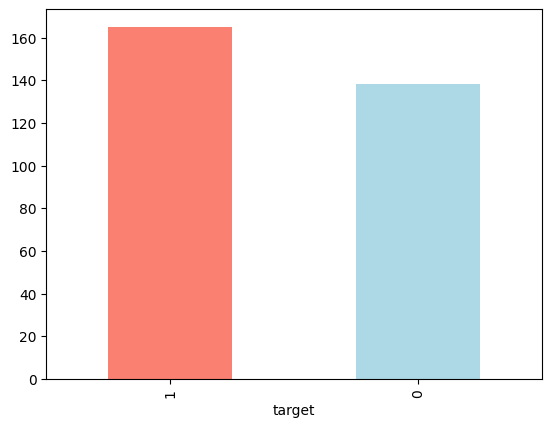

In [4]:
# Checking out the number of occurence for the different targets

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


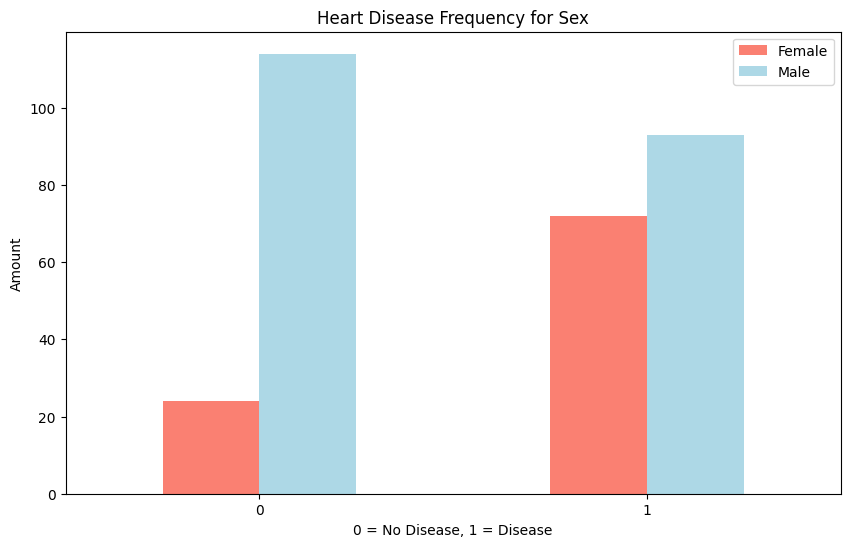

In [10]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

# Age Vs Max Heart Rate for Heart Disease

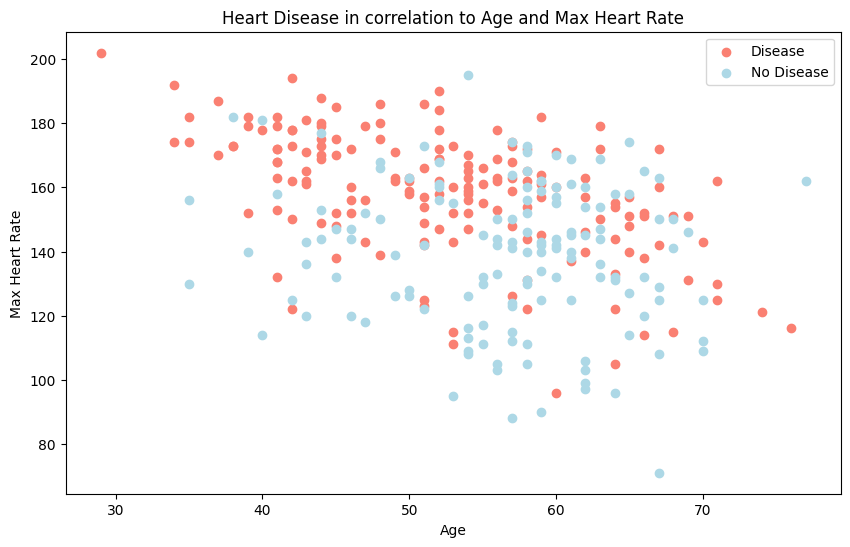

In [11]:
# Create a Scatter Plot
plt.figure(figsize = (10, 6))
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c="lightblue")
plt.title("Heart Disease in correlation to Age and Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.show()

## cp: chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic

In [12]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


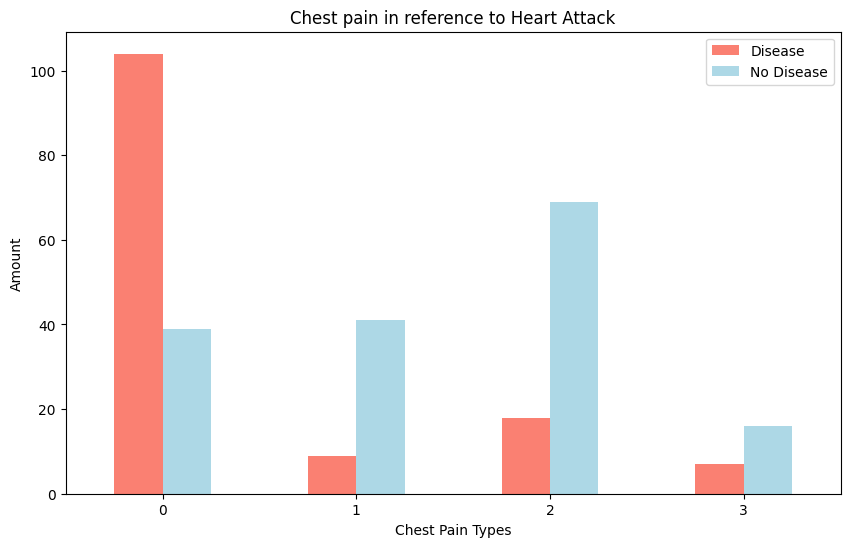

In [13]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Chest pain in reference to Heart Attack")
plt.legend(["Disease", "No Disease"])
plt.xlabel("Chest Pain Types")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show();

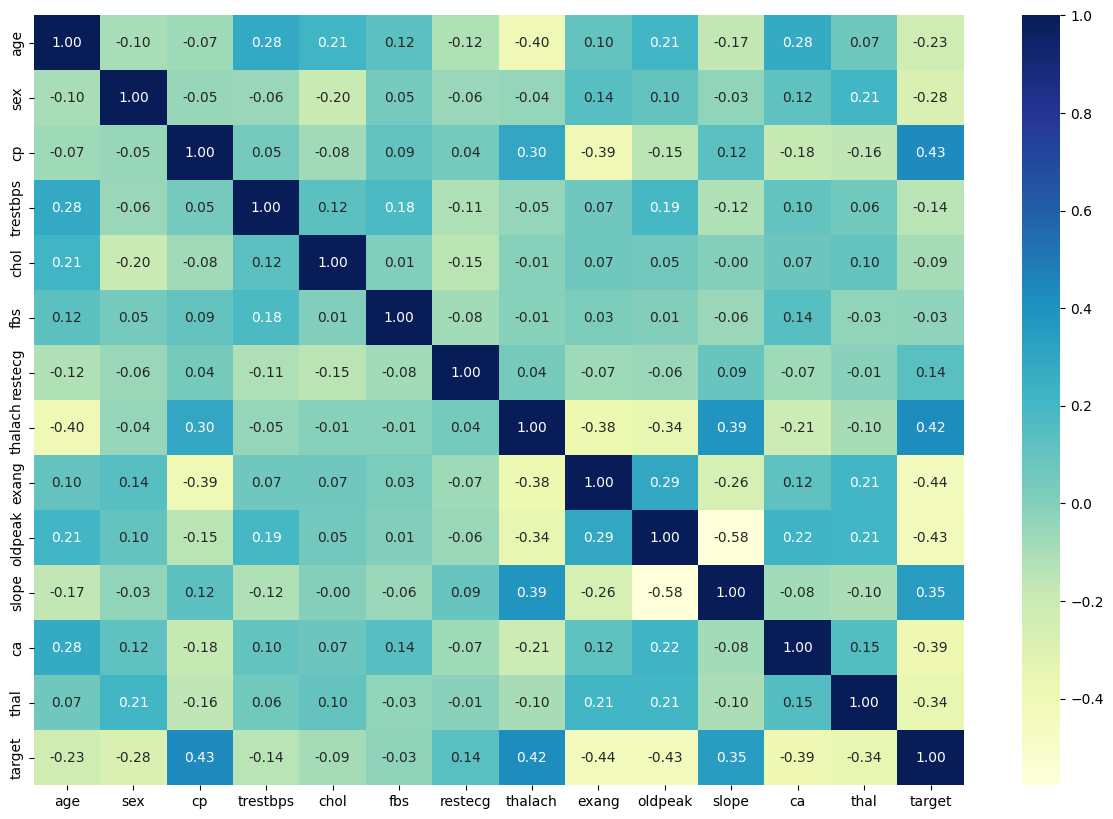

In [19]:
# Creating a correlation matrix

fig, ax = plt.subplots(figsize=(15,10));
ax = sns.heatmap(
    df.corr(),
    annot= True,
    fmt=".2f",
    cmap="YlGnBu"
)

plt.show();


## 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
X = df.drop("target",axis=1)
y = df["target"]

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

In [44]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [45]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [46]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [47]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [51]:
y_train, len(y_train)



(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### We have split our data into training and test splits, time to build the machine learning model

###### Find patterns using the training data and use these patterns on our test data

Trying the below models
1. KNN
2. Logistic Regression
3. Random forest classifier

In [55]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models
    models: a dictionary of different machine learning models
    X_train: Training data
    Y_train: Training labels
    X_test: Testing data
    """

    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append the score to the model score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



{'Logistic Regression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier()}

In [56]:
scores = fit_and_score(models= models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
scores

/home/teyddie/heart_disease/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

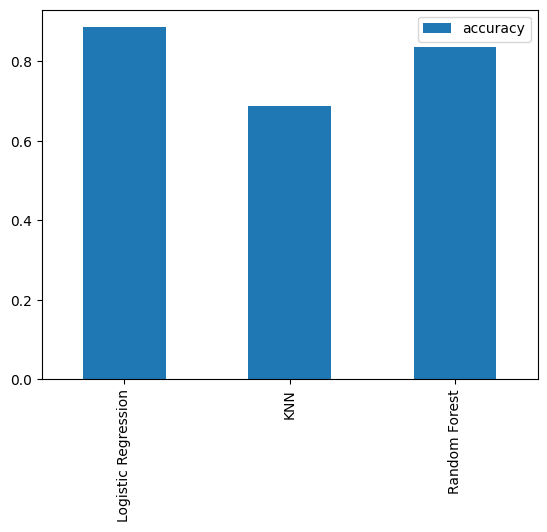

In [60]:
comparison = pd.DataFrame(scores, index=["accuracy"])
comparison.T.plot.bar()
plt.show();